# Using TLUSTY synthetic spectra

In [1]:
import matplotlib.pyplot as plt
import VPtools as vp

path_google = '/Users/vpetit/Library/CloudStorage/GoogleDrive-vpetit@udel.edu/Shared drives/'


## 1. How to access the synthetic spectra

The synthetic spectra can be downloaded from the TLUSTY website: https://tlusty.oca.eu/tlusty/index.html

These are non-LTE models without winds. 

ADD LINK TO PAPERS

We have a copy of these grids on the ResearchGroupResources Google Drive at ReferenceMaterial/TLUSTY
* OSTARS2002
* BSTARS2006

For each grid, there is a folder for UV spectra and for visible spectra ('uv' and 'vis'). In the case of the BSTAR2006, there are two choices of microturbulence velocity (2 and 10 km/s)

[ ] TODO make a cvs model reference table, and display in pandas

The files are names according to their temperature in kelvins, and the $\log(g)\times10$ (so $\log(g)=4.0$ would be '400'). 

The file paths and names might be a bit difficult to remember, so we have a template path/name that we can access in the module:

In [4]:
print(vp.tlusty.galO_path_name)
print(vp.tlusty.galB_path_name)

ResearchGroupResources-Files/ReferenceMaterial/TLUSTY/OSTAR2002/G{0}spec/G{1}g{2}v10.{0}
ResearchGroupResources-Files/ReferenceMaterial/TLUSTY/BSTAR2006/BG{0}spec_v{3}/BG{1}g{2}v{3}.{0}


and you can use the `format` function to add the model name and the wavelenght range that you would like to use. Note that for the BSTAR2006 template, you need to add the desired microturbulence velocity

In [5]:
my_model_name = vp.tlusty.galB_path_name.format('vis','23000','400','2')
print(my_model_name)

ResearchGroupResources-Files/ReferenceMaterial/TLUSTY/BSTAR2006/BGvisspec_v2/BG23000g400v2.vis


## 2. How to read in a synthetic spectrum

The TLUSTY grids provides two separate files:
1. The unnormalized flux spectrum
2. The continuum flux spectrum (so without the spectral lines)

:::{warning}
These two spectra do not have the same wavelength grid. 
:::

The first function, `read`, will return both spectra into two Synth objects

In [4]:
flux, cont = vp.tlusty.read(path_google+my_model_name)

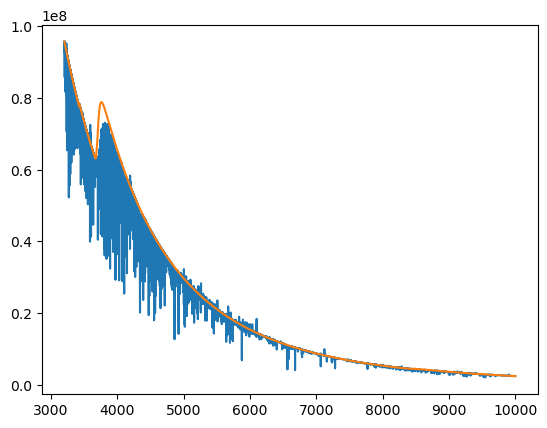

In [6]:
fig, ax = plt.subplots(1,1)

ax.plot(flux.wl, flux.specI)
ax.plot(cont.wl, cont.specI)


The second function, `read_norm` will read both files, interpolate the continnum spectrum to the wavelength axis of the line spectrum, and return a normalized spectrum.

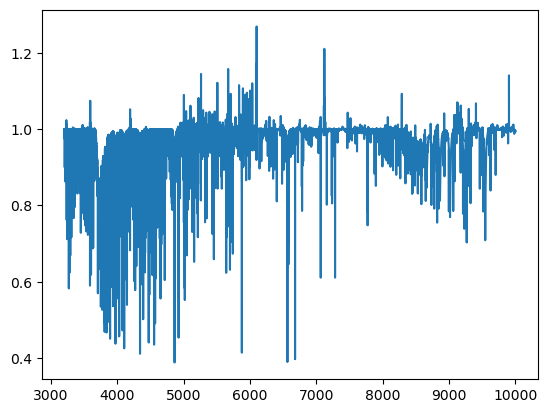

In [7]:
spec = vp.tlusty.read_norm(path_google+my_model_name)

fig, ax = plt.subplots(1,1)
ax.plot(spec.wl, spec.specI)